<a href="https://colab.research.google.com/github/Ayamokht/DL-NLP-Project/blob/main/NOTEBOOK_V0_Modeles_Aya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installer les bibliothèques manquantes
!pip install -q datasets transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cu

In [ ]:
# Google Colab - importer les données depuis Kaggle (plus rapide: 3min environ)

# 🔁 Uploader clé API Kaggle (fichier kaggle.json)
from google.colab import files
files.upload()  # Sélectionne ton fichier kaggle.json téléchargé depuis Kaggle

# 🔐 Configurer l'accès API Kaggle
import os
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

# 📦 Télécharger tes datasets Kaggle (remplacé avec les tiens)
!kaggle datasets download -d ayamokhta/product-text
!kaggle datasets download -d ayamokhta/bert-multilingual
!kaggle datasets download -d ayamokhta/nlp-dl-images

# 📂 Dézipper les fichiers téléchargés
import zipfile

with zipfile.ZipFile("product-text.zip", 'r') as zip_ref:
    zip_ref.extractall("rakuten_data/product_text")

with zipfile.ZipFile("bert-multilingual.zip", 'r') as zip_ref:
    zip_ref.extractall("rakuten_data/bert_multilingual")

with zipfile.ZipFile("nlp-dl-images.zip", 'r') as zip_ref:
    zip_ref.extractall("rakuten_data/nlp_dl_images")

# 📚 Vérifier que les fichiers sont bien là
import os
print("📁 Fichiers dans product-text :", os.listdir("rakuten_data/product_text"))
print("📁 Fichiers dans bert-multilingual :", os.listdir("rakuten_data/bert_multilingual"))
print("📁 Dossiers d'images :", os.listdir("rakuten_data/nlp_dl_images"))

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/ayamokhta/product-text
License(s): unknown
product-text.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset URL: https://www.kaggle.com/datasets/ayamokhta/bert-multilingual
License(s): unknown
bert-multilingual.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset URL: https://www.kaggle.com/datasets/ayamokhta/nlp-dl-images
License(s): unknown
nlp-dl-images.zip: Skipping, found more recently modified local copy (use --force to force download)
📁 Fichiers dans product-text : ['Y_train_CVw08PX.csv', 'X_train_update.csv', 'X_test_update.csv']
📁 Fichiers dans bert-multilingual : ['bert-multilingual-cased']
📁 Dossiers d'images : ['image_train', 'image_test']


## Modèle Texte (baseline)

****Le fichier X_test était prévu pour des prédictions finales dans un contexte de compétition, mais comme les vraies cibles ne sont pas fournies, il n’est pas utilisé pour l’évaluation dans ce projet.****

In [ ]:
import pandas as pd
import os

# === Chargement des CSV ===
x_train = pd.read_csv("rakuten_data/product_text/X_train_update.csv")
y_train = pd.read_csv("rakuten_data/product_text/Y_train_CVw08PX.csv")
# x_test = pd.read_csv("rakuten_data/product_text/X_test_update.csv")

print("x_train :", x_train.shape)
print("y_train :", y_train.shape)
#rint("x_test  :", x_test.shape)

x_train : (84916, 5)
y_train : (84916, 2)


In [ ]:
# Supprimer la colonne d’index inutile
y_train = y_train.drop(columns=["Unnamed: 0"], errors='ignore')

# Vérifie qu’il ne reste que la bonne colonne
print(y_train.columns)  # doit afficher ['prdtypecode']

# Fusion propre
df_train = pd.concat([x_train, y_train], axis=1)
print("✅ Fusion réussie :", df_train.shape)
df_train.head()

Index(['prdtypecode'], dtype='object')
✅ Fusion réussie : (84916, 6)


,Unnamed: 0,designation,description,productid,imageid,prdtypecode
0,0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,10
1,1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,2280
2,2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,50
3,3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496,1280
4,4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,2705


prdtypecode → la variable cible !

In [ ]:
# dataframe finale pour l'entrainement:
df_train.head()

,Unnamed: 0,designation,description,productid,imageid,prdtypecode
0,0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,10
1,1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,2280
2,2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,50
3,3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496,1280
4,4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,2705


### Analyse exploratoire des données

In [ ]:
df_train["prdtypecode"].nunique() ## on a 27 catégorie de prdts

27

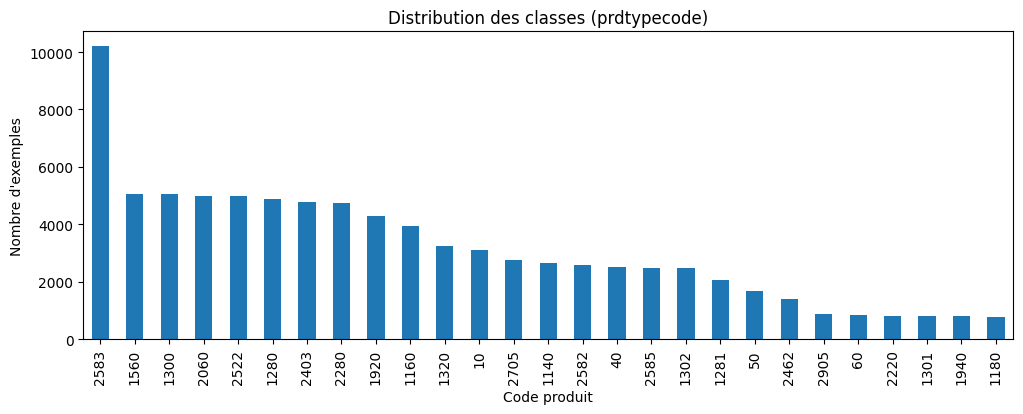

In [ ]:
import matplotlib.pyplot as plt

df_train["prdtypecode"].value_counts().plot(kind="bar", figsize=(12,4))
plt.title("Distribution des classes (prdtypecode)")
plt.xlabel("Code produit")
plt.ylabel("Nombre d'exemples")
plt.show()

In [ ]:
df_train["description"].isna().mean()

# 35% de valeurs manquantes sur la colonne description..

np.float64(0.3509350416882566)

In [ ]:
# 📸 Vérification des chemins d'images
image_folder = "rakuten_data/nlp_dl_images/image_train/image_train"

# Générer le nom de fichier image
df_train["image_filename"] = df_train.apply(
    lambda row: f"image_{row['imageid']}_product_{row['productid']}.jpg", axis=1)

# Chemin complet + existence
from pathlib import Path
df_train["image_path"] = df_train["image_filename"].apply(lambda x: os.path.join(image_folder, x))
df_train["image_exists"] = df_train["image_path"].apply(lambda path: Path(path).exists())

print("✅ Images trouvées :", df_train["image_exists"].sum())
print("❌ Images manquantes :", (~df_train["image_exists"]).sum())

✅ Images trouvées : 84916
❌ Images manquantes : 0


🔹 designation: La Guerre Des Tuques
🔹 description: Luc a des id&eacute;es de grandeur. Il veut organiser un jeu de guerre de boules de neige et s'arranger pour en &ecirc;tre le vainqueur incontest&eacute;. Mais Sophie s'en m&ecirc;le et chambarde tous ses plans...
🔹 prdtypecode: 2705


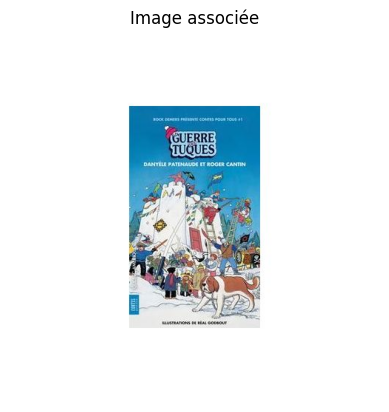

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

def show_example(row_index):
    row = df_train.iloc[row_index]
    print("🔹 designation:", row["designation"])
    print("🔹 description:", row["description"])
    print("🔹 prdtypecode:", row["prdtypecode"])

    if row["image_exists"]:
        img = Image.open(row["image_path"])
        plt.imshow(img)
        plt.axis("off")
        plt.title("Image associée")
        plt.show()
    else:
        print("❌ Image non trouvée.")

# un exemple qui a une image existante
example_index = df_train[df_train["image_exists"]].index[4]
show_example(example_index)

In [ ]:
df_train.head()

,Unnamed: 0,designation,description,productid,imageid,prdtypecode,image_filename,image_path,image_exists
0,0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,10,image_1263597046_product_3804725264.jpg,rakuten_data/nlp_dl_images/image_train/image_t...,True
1,1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,2280,image_1008141237_product_436067568.jpg,rakuten_data/nlp_dl_images/image_train/image_t...,True
2,2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,50,image_938777978_product_201115110.jpg,rakuten_data/nlp_dl_images/image_train/image_t...,True
3,3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496,1280,image_457047496_product_50418756.jpg,rakuten_data/nlp_dl_images/image_train/image_t...,True
4,4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,2705,image_1077757786_product_278535884.jpg,rakuten_data/nlp_dl_images/image_train/image_t...,True


## Pre-processing du texte

In [ ]:
import re

def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s]", " ", text)  # enlève tout sauf lettres/chiffres/espaces
    text = re.sub(r"\s+", " ", text).strip()  # supprime les espaces multiples
    return text

df_train["clean_text"] = df_train["designation"].apply(clean_text)

# Aperçu
df_train[["designation", "clean_text"]].head()

,designation,clean_text
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,olivia personalisiertes notizbuch 150 seiten p...
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,journal des arts le n 133 du 28 09 2001 l art ...
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,grand stylet ergonomique bleu gamepad nintendo...
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,peluche donald europe disneyland 2000 marionne...
4,La Guerre Des Tuques,la guerre des tuques


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Paramètres de base
max_words = 10000  # taille du vocabulaire
max_len = 30       # taille maximale des séquences (en nombre de mots)

# Créer le tokenizer
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df_train["clean_text"])

# Transformer les textes en séquences de nombres
sequences = tokenizer.texts_to_sequences(df_train["clean_text"])

# Appliquer du padding pour avoir des séquences de même taille
X_text = pad_sequences(sequences, maxlen=max_len, padding="post", truncating="post")

print("✅ Séquences shape :", X_text.shape)

✅ Séquences shape : (84916, 30)


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Encoder les classes (ex : 50 → 0, 1280 → 1, etc.)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df_train["prdtypecode"])

# Conversion en one-hot
y_onehot = to_categorical(y_encoded)

print("✅ y_onehot shape :", y_onehot.shape)

✅ y_onehot shape : (84916, 27)


### -  Approche simple de classification

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Créer le vecteur TF-IDF sur les titres nettoyés
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_tfidf = tfidf.fit_transform(df_train["clean_text"])

print("✅ TF-IDF matrix shape :", X_tfidf.shape)

✅ TF-IDF matrix shape : (84916, 10000)


In [ ]:
# y_encoded a déjà été défini précédemment
print("Nombre de classes :", len(set(y_encoded)))

Nombre de classes : 27


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train_, y_val_ = train_test_split(X_tfidf, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)
print("✅ Split :", X_train.shape, X_val.shape)

✅ Split : (67932, 10000) (16984, 10000)


### Regression Logistique

Texte brut ➜ Nettoyage ➜ TF-IDF ➜ Régression Logistique


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train_)

y_pred_lr = lr.predict(X_val)
print("F1 pondéré LogisticRegression :", f1_score(y_val_, y_pred_lr, average='weighted'))

F1 pondéré LogisticRegression : 0.788866053935441


In [ ]:
### cross validation

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score

# Régression logistique
lr = LogisticRegression(max_iter=1000)

# Utiliser F1 pondéré comme métrique de scoring
scorer = make_scorer(f1_score, average='weighted')

# Appliquer 5-fold cross-validation
scores = cross_val_score(lr, X_tfidf, y_encoded, cv=5, scoring=scorer, n_jobs=-1)

print("F1-score pondéré (CV sur 5 folds) :")
print("Moyenne :", scores.mean())
print("Écart-type :", scores.std())

F1-score pondéré (CV sur 5 folds) :
  Moyenne : 0.7880346875517222
  Écart-type : 0.0021494505490032697


### Transformers (BERT Multilingue)
Texte brut ➜ Tokenizer BERT ➜ Embedding contextuel (pré-entraîné) ➜ Fine-tuning ➜ Classification


In [ ]:
import os
import numpy as np
import pandas as pd
from datasets import Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from transformers import BertTokenizer, BertForSequenceClassification, TrainingArguments, Trainer

# 🔌 Désactiver wandb (optionnel)
os.environ["WANDB_DISABLED"] = "true"

# 📂 Chargement des données (on suppose déjà téléchargées/décompressées)
x_train = pd.read_csv("rakuten_data/product_text/X_train_update.csv")
y_train = pd.read_csv("rakuten_data/product_text/Y_train_CVw08PX.csv")

# 🔁 Encoder les labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_train["prdtypecode"])

# 🔀 Split en train/val
train_texts, val_texts, train_labels, val_labels = train_test_split(
    x_train["designation"], y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# 📚 Datasets HuggingFace
train_dataset = Dataset.from_dict({"text": train_texts.tolist(), "label": train_labels.tolist()})
val_dataset = Dataset.from_dict({"text": val_texts.tolist(), "label": val_labels.tolist()})

# 🔠 Tokenizer
model_path = "rakuten_data/bert_multilingual/bert-multilingual-cased"
tokenizer = BertTokenizer.from_pretrained(model_path)

def tokenize(batch):
    return tokenizer(batch["text"], padding="max_length", truncation=True, max_length=128)

train_dataset = train_dataset.map(tokenize, batched=True)
val_dataset = val_dataset.map(tokenize, batched=True)
train_dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])
val_dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])

# 🧠 Modèle BERT simple
model = BertForSequenceClassification.from_pretrained(model_path, num_labels=len(label_encoder.classes_))

# 📏 Métrique
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    return {"f1_weighted": f1_score(labels, preds, average="weighted")}

# ⚙️ Entraînement simple (1 époque pour test rapide)
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    num_train_epochs=1,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    learning_rate=2e-5,
    logging_dir="./logs",
    load_best_model_at_end=True,
    metric_for_best_model="f1_weighted",
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

trainer.train()

Map:   0%|          | 0/67932 [00:00<?, ? examples/s]

Map:   0%|          | 0/16984 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at rakuten_data/bert_multilingual/bert-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
print("✅ Labels uniques dans le dataset de validation :", set(val_dataset["label"]))
assert all(0 <= x < len(label_encoder.classes_) for x in val_dataset["label"]), "❌ Label en dehors de [0, 26]"

✅ Labels uniques dans le dataset de validation : {tensor(9), tensor(5), tensor(13), tensor(23), tensor(6), tensor(23), tensor(24), tensor(18), tensor(4), tensor(23), tensor(21), tensor(7), tensor(23), tensor(25), tensor(0), tensor(21), tensor(8), tensor(16), tensor(18), tensor(13), tensor(4), tensor(23), tensor(14), tensor(12), tensor(19), tensor(3), tensor(21), tensor(18), tensor(25), tensor(16), tensor(7), tensor(21), tensor(21), tensor(9), tensor(23), tensor(16), tensor(19), tensor(12), tensor(7), tensor(17), tensor(14), tensor(11), tensor(14), tensor(16), tensor(12), tensor(21), tensor(21), tensor(9), tensor(0), tensor(19), tensor(1), tensor(6), tensor(12), tensor(13), tensor(12), tensor(6), tensor(8), tensor(19), tensor(6), tensor(9), tensor(16), tensor(0), tensor(19), tensor(5), tensor(21), tensor(1), tensor(0), tensor(20), tensor(11), tensor(23), tensor(3), tensor(5), tensor(9), tensor(7), tensor(9), tensor(23), tensor(18), tensor(21), tensor(7), tensor(18), tensor(18), tensor(2

In [ ]:
# ✅ Prédictions sur le jeu de validation
predictions = trainer.predict(val_dataset)
logits = predictions.predictions
y_true = predictions.label_ids
y_pred = np.argmax(logits, axis=1)

# 🎯 F1-score pondéré
f1 = f1_score(y_true, y_pred, average="weighted")
print("
✅ F1-score pondéré sur validation :", round(f1, 4))

# 🧾 DataFrame résultats texte / vrai / prédit
val_texts_list = val_texts.tolist()
results_df = pd.DataFrame({
    "text": val_texts_list,
    "true_label": y_true,
    "predicted_label": y_pred
})

# 🔍 Affichage de quelques erreurs
errors = results_df[results_df.true_label != results_df.predicted_label]
print("
🔍 Quelques erreurs de prédiction :")
print(errors.sample(5))

### RESNET (Images)

In [ ]:
# Split images pour modèle ResNet (80/20)
from sklearn.model_selection import train_test_split

# Garder uniquement les lignes avec image existante
df_img = df_train[df_train["image_exists"] == True]

# Split train/val
df_train_img, df_val_img = train_test_split(
    df_img,
    test_size=0.2,
    stratify=df_img["prdtypecode"],
    random_state=42
)

print("📊 Images pour entraînement :", df_train_img.shape[0])
print("📊 Images pour validation :", df_val_img.shape[0])

📊 Images pour entraînement : 67932
📊 Images pour validation : 16984


In [ ]:
# Dataset PyTorch personnalisé pour les images
from torch.utils.data import Dataset
from PIL import Image
import torch
from torchvision import transforms

class CustomImageDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.data = dataframe.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data.loc[idx, "image_path"]
        label = self.data.loc[idx, "prdtypecode"]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label

# 📐 Transforms pour ResNet50
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 📦 Création des datasets
train_dataset = CustomImageDataset(df_train_img, transform=transform)
val_dataset = CustomImageDataset(df_val_img, transform=transform)

In [ ]:
# Dataloaders
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

print("✅ Dataloaders prêts :", len(train_loader), "batches de train |", len(val_loader), "batches de val")

In [ ]:
# Charger et adapter le modèle ResNet50
import torchvision.models as models
import torch.nn as nn

num_classes = df_train["prdtypecode"].nunique()

model = models.resnet50(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, num_classes)  # remplacer la dernière couche FC

In [ ]:
# Entraînement du modèle ResNet50
import torch.optim as optim
from sklearn.metrics import f1_score
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

num_epochs = 3

for epoch in range(num_epochs):
    print(f"
🔁 Epoch {epoch+1}/{num_epochs}")
    model.train()
    train_loss = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    print(f"✅ Loss entraînement : {train_loss/len(train_loader):.4f}")

    # 🔍 Évaluation
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1).cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.numpy())

    f1 = f1_score(all_labels, all_preds, average='weighted')
    print(f"🎯 F1-score pondéré validation : {f1:.4f}")